# Questão 1 (valor 2 pontos)

Você deve criar a seguinte CNN usando o Keras:

|Input: 32x32x3|
|---|
|Conv2D: 16 neurônios (filters), kernels 3x3, ReLU|
|MaxPooling2D: pool 2x2|
|Conv2D: 16 neurônios (filters), kernels 3x3, ReLU|
|Conv2D: 16 neurônios (filters), kernels 3x3, ReLU|
|MaxPooling2D: pool 2x2|
|Conv2D: 16 neurônios (filters), kernels 3x3, ReLU|
|Conv2D: 16 neurônios (filters), kernels 3x3, ReLU|
|MaxPooling2D: pool 2x2|
|Dense: 10 neuronios|



Dicas:
1. Use uma camada do tipo Flatten para transformar o output do terceiro max
pooling (que será um tensor) em um vetor;
2. Use o parâmetro padding='same' em TODAS as camadas convolucionais,
para que a convolução trate as bordas da imagem (e não haja redução no
tamanho dos tensores).


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import tensorflow as tf

In [7]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Flatten())
    model.add(Dense(10, activation=tf.keras.activations.softmax))

    return model


# Questão 2 (valor 2 pontos)
Carregue as duas bases de dados (CIFAR-10 e SVHN):

#### a) Ao carregar a base de dados CIFAR-10 você irá notar que y_train e y_test têm duas dimensões. Transforme eles em vetores.

In [8]:
import numpy as np

cifar10 = tf.keras.datasets.cifar10
(c10_X_train, c10_y_train), (c10_X_test, c10_y_test) = cifar10.load_data()

In [9]:
print('Shape antes da conversão')
print(f'Para base de treino: X={c10_X_train.shape}, y={c10_y_train.shape}')
print(f'Para base de teste: X={c10_X_test.shape}, y={c10_y_test.shape}')

c10_y_train = c10_y_train.reshape((-1))
c10_y_test = c10_y_test.reshape((-1))

print('\nShape depois da conversão')
print(f'Para base de treino: y={c10_y_train.shape}')
print(f'Para base de teste: y={c10_y_test.shape}')

Shape antes da conversão
Para base de treino: X=(50000, 32, 32, 3), y=(50000, 1)
Para base de teste: X=(10000, 32, 32, 3), y=(10000, 1)

Shape depois da conversão
Para base de treino: y=(50000,)
Para base de teste: y=(10000,)


#### b) Ao carregar a base de dados SVHN, e entender sua estrutura, você irá notar que X_train e X_test estão com as dimensões em uma ordem diferente da que usamos na aula (e que o Keras usa por padrão). Transforme tais arrays para ter a ordem que normalmente usamos (id da imagem, linhas, colunas e canais);


In [10]:
import scipy.io as sio

SVHN_test = sio.loadmat('test_32x32.mat')
SVHN_train = sio.loadmat('train_32x32.mat')

SVHN_X_test, SVHN_y_test = SVHN_test['X'], SVHN_test['y']
SVHN_X_train, SVHN_y_train = SVHN_train['X'], SVHN_train['y']

print('Shapes dos dados antes da conversão:')
print(f'Para base de treino: X={SVHN_X_test.shape}, y={SVHN_y_test.shape}')
print(f'Para base de teste: X={SVHN_X_train.shape}, y={SVHN_y_train.shape}')

Shapes dos dados antes da conversão:
Para base de treino: X=(32, 32, 3, 26032), y=(26032, 1)
Para base de teste: X=(32, 32, 3, 73257), y=(73257, 1)


In [11]:
del SVHN_test, SVHN_train

O padrão até então utilizado é usando imagens 32x32 com 3 canais RBG, com isto o shape 32x32x3, que é comum nos dois exemplos. Porém o que diferencia é a quantidade de imagens N, que é mais utilizada sendo Nx32x32x3 e neste caso temos 32x32x3xN.

In [12]:
# Trocando a ultima dimensao (indice 3) para 0 e shiftando 1 para a direita com as demais

SVHN_X_test= np.transpose(SVHN_X_test,(3,0,1,2))
SVHN_X_train= np.transpose(SVHN_X_train,(3,0,1,2))

SVHN_y_test = SVHN_y_test.reshape((-1))
SVHN_y_train = SVHN_y_train.reshape((-1))

print('Shapes dos dados depois da conversão:')
print(f'Para base de treino: X={SVHN_X_test.shape}, y={SVHN_y_test.shape}')
print(f'Para base de teste: X={SVHN_X_train.shape}, y={SVHN_y_train.shape}')

Shapes dos dados depois da conversão:
Para base de treino: X=(26032, 32, 32, 3), y=(26032,)
Para base de teste: X=(73257, 32, 32, 3), y=(73257,)


#### c) Transforme o valor dos pixels das imagens para o intervalo [0; 1];


In [13]:
# Cada canal R, G e B possui 2^8 = 256 cores distintas
# possuindo valores entre 0 e 255, como podemos ver
print(f'Valor minimo: {SVHN_X_train.min()}')
print(f'Valor maximo: {SVHN_X_train.max()}')
print('')

# Com isto, basta dividir por 255 para normalizar entre 0 e 1
SVHN_X_train = np.float16(SVHN_X_train/255)
SVHN_X_test = np.float16(SVHN_X_test/255)
c10_X_test = np.float16(c10_X_test/255)
c10_X_train = np.float16(c10_X_train/255)

# Verificando se os valores estao no intervalo [0;1]

print(f'Novo valor minimo: {SVHN_X_train.min()}')
print(f'Novo valor maximo: {SVHN_X_train.max()}')

Valor minimo: 0
Valor maximo: 255

Novo valor minimo: 0.0
Novo valor maximo: 1.0


### d) Para cada uma das duas bases, compute:
- Quantidade de imagens de treino e teste
- Tamanho (número de linhas, colunas e canais) das imagens
- Distribuição das classes


Como explicado anteriormente (item b), podemos obter a quantidade de imagens vendo o primeiro numero do shape. E o tamanho será as 3 demais dimensoes

In [14]:
import seaborn as sns

def print_info(X, y):
    print(f'Quantidade de imagens =', X.shape[0])
    print(f'Numero de linhas = {X.shape[1]}, numero de colunas = {X.shape[2]}')
    print(f'Quantidade de canais = {X.shape[3]}\n')

    print(f'Quantidade de classes distintas = {len(np.unique(y))}')
    sns.histplot(y)


Para os dados de treino do Cifar 10:

Quantidade de imagens = 50000
Numero de linhas = 32, numero de colunas = 32
Quantidade de canais = 3

Quantidade de classes distintas = 10


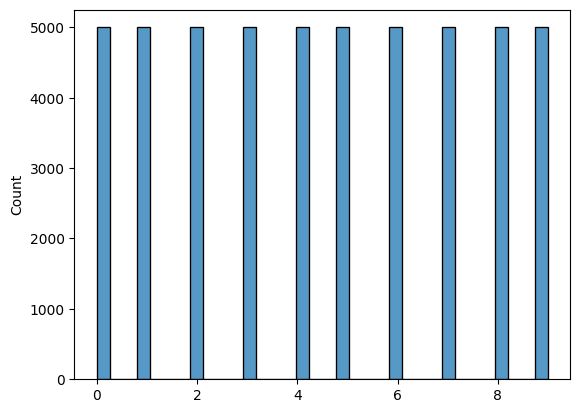

In [15]:
print('Para os dados de treino do Cifar 10:\n')
print_info(c10_X_train, c10_y_train)

Para os dados de teste do Cifar 10:

Quantidade de imagens = 10000
Numero de linhas = 32, numero de colunas = 32
Quantidade de canais = 3

Quantidade de classes distintas = 10


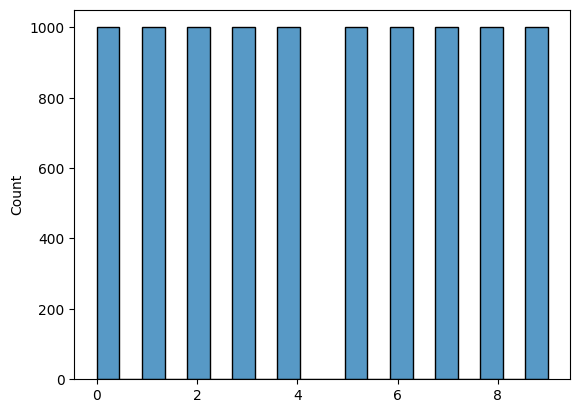

In [16]:
print('Para os dados de teste do Cifar 10:\n')
print_info(c10_X_test, c10_y_test)

Para os dados de treino do SVHN:

Quantidade de imagens = 73257
Numero de linhas = 32, numero de colunas = 32
Quantidade de canais = 3

Quantidade de classes distintas = 10


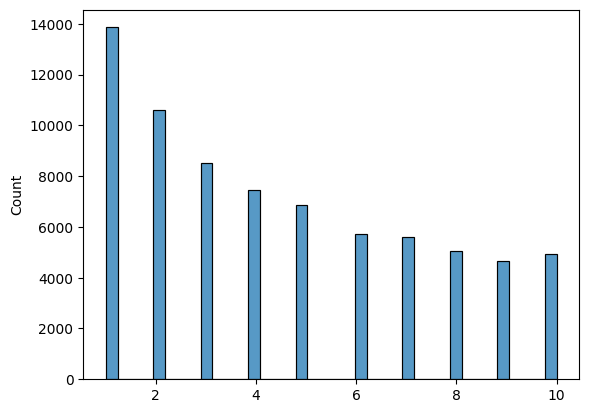

In [17]:
print('Para os dados de treino do SVHN:\n')
print_info(SVHN_X_train, SVHN_y_train)

Para os dados de treino do SVHN:

Quantidade de imagens = 26032
Numero de linhas = 32, numero de colunas = 32
Quantidade de canais = 3

Quantidade de classes distintas = 10


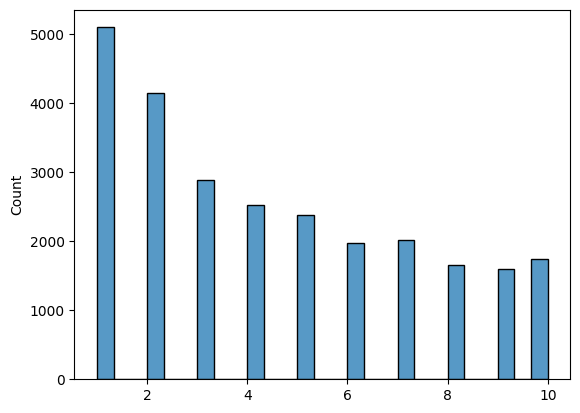

In [18]:
print('Para os dados de treino do SVHN:\n')
print_info(SVHN_X_test, SVHN_y_test)

Dicas (que podem facilitar muito esse e os próximos itens):
1. A função loadmat da biblioteca scipy permite fazer a leitura dos arquivos
.mat (base SVHN);
2. Converter as imagens (X_train e X_test) para float16 pode ajudar a reduzir o
consumo de RAM. O numpy permite fazer tal conversão com um código do
tipo: np.float16(X);
3. Converter as classes (y_train e y_test) para uint8 permite reduzir o consumo
de RAM.

# Questão 3 (valor 2 pontos)
Vamos gerar versões ruidosas das bases de imagens e ver como isso afeta sua
qualidade visual.


#### a) Gerar versões das duas bases de dados afetadas por ruído gaussiano com variâncias de 0.001 e 0.01, respectivamente;


In [19]:
from skimage.util import random_noise

def gen_noise(X_train, X_test, var):
  X_train_noise = random_noise(X_train, mode='gaussian', var=var)
  X_test_noise = random_noise(X_test, mode='gaussian', var=var)

  return np.float16(X_train_noise), np.float16(X_test_noise)

In [20]:
from skimage.util import random_noise

c10_X_train_n001, c10_X_test_n001 = gen_noise(c10_X_train, c10_X_test, 0.001)
c10_X_train_n01, c10_X_test_n01 = gen_noise(c10_X_train, c10_X_test, 0.01)

SVHN_X_train_n001, SVHN_X_test_n001 = gen_noise(SVHN_X_train, SVHN_X_test, 0.001)
SVHN_X_train_n01, SVHN_X_test_n01 = gen_noise(SVHN_X_train, SVHN_X_test, 0.01)

#### b) Mostrar uma imagem de cada uma das classes em 3 versões (original, Gauss 0.001 e Gauss 0.01). Isso deve ser feito para as duas bases (CIFAR-10 e SVHN).
O ruído gaussiano gera imagens parecidas com as do seguinte exemplo, no qual
temos: as imagens originais na primeira linha, imagens com ruído gaussiano (var
0.001) na segunda linha e imagens com ruído gaussiano (var 0.01) na terceira linha.


Dica:
1. Para gerar as imagens com ruído gaussiano use a função random_noise da
biblioteca scikit-image. Tal função de ser usada da seguinte forma:
random_noise(img_original, mode='gaussian', var=0.01)

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

def show_imgs(X, X_noise001, X_noise01, qnt_img, random_imgs=False):
    begin = 0

    if(random_imgs):
        begin = np.random.randint(np.random.randint(X.shape[0]-qnt_img))

    end = begin + qnt_img

    for counter, i in enumerate(range(begin, end)):
        img_clean = Image.fromarray(np.uint8(X[i]*255))
        img_noise001 = Image.fromarray(np.uint8(X_noise001[i]*255))
        img_noise01 = Image.fromarray(np.uint8(X_noise01[i]*255))

        plt.subplot(3,qnt_img,counter+1)
        plt.axis('off')
        plt.imshow(img_clean)

        plt.subplot(3,qnt_img,counter+1+qnt_img)
        plt.axis('off')
        plt.imshow(img_noise001)

        plt.subplot(3,qnt_img,counter+1+(2*qnt_img))
        plt.axis('off')
        plt.imshow(img_noise01)

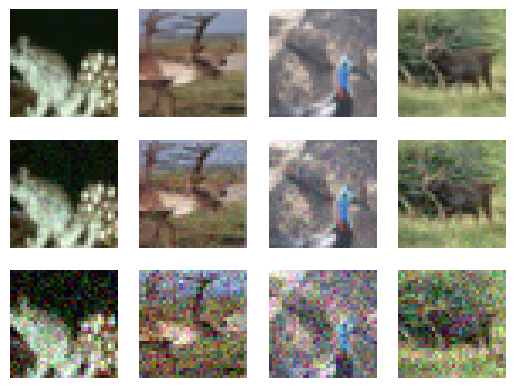

In [22]:
show_imgs(c10_X_train, c10_X_train_n001, c10_X_train_n01, 4, random_imgs=True)

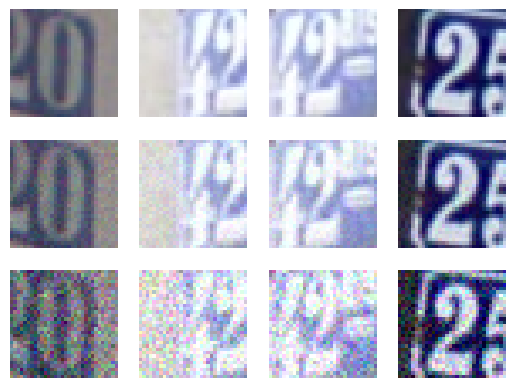

In [23]:
show_imgs(SVHN_X_train, SVHN_X_train_n001, SVHN_X_train_n01, 4, random_imgs=True)


# Questão 4 (valor 2 pontos)
Treinar uma versão do modelo para cada versão das bases de dados. Ou seja, você
deve treinar os seguintes seis modelos:
1. Modelo treinado na CIFAR-10 original;
2. Modelo treinado na CIFAR-10 Gauss 0.001;
3. Modelo treinado na CIFAR-10 Gauss 0.01;
4. Modelo treinado na SVHN original;
5. Modelo treinado na SVHN Gauss 0.001;
6. Modelo treinado na SVHN Gauss 0.01;


Todos os modelos devem ser treinado usando:
- Adam como otimizador;
- Por 10 epocas;
- Os demais parâmetros devem ser deixados como padrão.

Dica:
1. Você pode salvar os modelos e depois carregá-los novamente, com as
funções save e load_model. Verifique a documentação do Keras.

In [24]:
# Para usar o modelo, passando para categorias
from tensorflow.keras.utils import to_categorical

c10_y_train = np.uint8(to_categorical(c10_y_train))
c10_y_test = np.uint8(to_categorical(c10_y_test))

# No dataset SVHN possuimos 10 classes, porem sao rotuladas entre 1 e 10
# Para usar o to_categorical, sera shiftado para esquerda
# Desta forma as classes sao rotuladas entre 0 e 9

SVHN_y_train = SVHN_y_train-1
SVHN_y_test = SVHN_y_test-1
SVHN_y_train = np.uint8(to_categorical(SVHN_y_train))
SVHN_y_test = np.uint8(to_categorical(SVHN_y_test))

In [25]:
def train_model(model, X_train, y_train, X_test, y_test):

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        epochs=10
    )


In [26]:
model_c10 = create_model()
train_model(model_c10, c10_X_train, c10_y_train, c10_X_test, c10_y_test)

#model_c10.save('model_c10')

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.6140 - accuracy: 0.4094 - val_loss: 1.3679 - val_accuracy: 0.5036
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3174 - accuracy: 0.5288 - val_loss: 1.2635 - val_accuracy: 0.5498
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1829 - accuracy: 0.5835 - val_loss: 1.1440 - val_accuracy: 0.6030
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0999 - accuracy: 0.6126 - val_loss: 1.0745 - val_accuracy: 0.6244
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0392 - accuracy: 0.6315 - val_loss: 1.0372 - val_accuracy: 0.6378
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9955 - accuracy: 0.6496 - val_loss: 1.0290 - val_accuracy: 0.6365
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9571 - accuracy: 0.6619 - val_loss: 1.0049 - val_accur

In [27]:
model_c10_n001 = create_model()
train_model(model_c10_n001, c10_X_train_n001, c10_y_train, c10_X_test_n001, c10_y_test)

#model_c10_n001.save('model_c10_n001')

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6458 - accuracy: 0.4008 - val_loss: 1.5078 - val_accuracy: 0.4436
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3281 - accuracy: 0.5223 - val_loss: 1.2786 - val_accuracy: 0.5360
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1949 - accuracy: 0.5746 - val_loss: 1.2018 - val_accuracy: 0.5754
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1086 - accuracy: 0.6061 - val_loss: 1.1053 - val_accuracy: 0.6101
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0445 - accuracy: 0.6309 - val_loss: 1.0506 - val_accuracy: 0.6273
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9980 - accuracy: 0.6482 - val_loss: 1.0579 - val_accuracy: 0.6271
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9635 - accuracy: 0.6584 - val_loss: 0.9994 - val_accura

In [28]:
model_c10_n01 = create_model()
train_model(model_c10_n01, c10_X_train_n01, c10_y_train, c10_X_test_n01, c10_y_test)

#model_c10_n01.save('model_c10_n01')

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.6856 - accuracy: 0.3868 - val_loss: 1.5158 - val_accuracy: 0.4513
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3956 - accuracy: 0.4956 - val_loss: 1.3095 - val_accuracy: 0.5240
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2772 - accuracy: 0.5449 - val_loss: 1.2852 - val_accuracy: 0.5393
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1937 - accuracy: 0.5742 - val_loss: 1.1833 - val_accuracy: 0.5739
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1416 - accuracy: 0.5926 - val_loss: 1.1493 - val_accuracy: 0.5908
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0951 - accuracy: 0.6111 - val_loss: 1.1403 - val_accuracy: 0.5944
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0595 - accuracy: 0.6258 - val_loss: 1.1042 - val_accuracy

In [29]:
model_SVHN = create_model()
train_model(model_SVHN, SVHN_X_train, SVHN_y_train, SVHN_X_test, SVHN_y_test)

# model_SVHN.save('model_SVHN')

Epoch 1/10
2290/2290 [==============================] - 18s 7ms/step - loss: 1.0279 - accuracy: 0.6679 - val_loss: 0.5946 - val_accuracy: 0.8271
Epoch 2/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.5210 - accuracy: 0.8442 - val_loss: 0.5237 - val_accuracy: 0.8478
Epoch 3/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4418 - accuracy: 0.8703 - val_loss: 0.4465 - val_accuracy: 0.8710
Epoch 4/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.3980 - accuracy: 0.8817 - val_loss: 0.4346 - val_accuracy: 0.8734
Epoch 5/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.3688 - accuracy: 0.8901 - val_loss: 0.4104 - val_accuracy: 0.8800
Epoch 6/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.3501 - accuracy: 0.8956 - val_loss: 0.3910 - val_accuracy: 0.8864
Epoch 7/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.3346 - accuracy: 0.9013 - val_loss: 0.3813 - val_ac

In [30]:
model_SVHN_n001 = create_model()
train_model(model_SVHN_n001, SVHN_X_train_n001, SVHN_y_train, SVHN_X_test_n001, SVHN_y_test)

# model_SVHN_n001.save('model_SVHN_n001')

Epoch 1/10
2290/2290 [==============================] - 18s 7ms/step - loss: 1.2877 - accuracy: 0.5674 - val_loss: 0.7427 - val_accuracy: 0.7737
Epoch 2/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.6246 - accuracy: 0.8112 - val_loss: 0.5723 - val_accuracy: 0.8319
Epoch 3/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.5050 - accuracy: 0.8498 - val_loss: 0.5092 - val_accuracy: 0.8523
Epoch 4/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.4467 - accuracy: 0.8672 - val_loss: 0.4644 - val_accuracy: 0.8674
Epoch 5/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4139 - accuracy: 0.8771 - val_loss: 0.4582 - val_accuracy: 0.8658
Epoch 6/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.3936 - accuracy: 0.8837 - val_loss: 0.4516 - val_accuracy: 0.8675
Epoch 7/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.3776 - accuracy: 0.8873 - val_loss: 0.4197 - val_ac

In [31]:

model_SVHN_n01 = create_model()
train_model(model_SVHN_n01, SVHN_X_train_n01, SVHN_y_train, SVHN_X_test_n01, SVHN_y_test)

# model_SVHN_n01.save('model_SVHN_n01')

Epoch 1/10
2290/2290 [==============================] - 18s 7ms/step - loss: 1.1104 - accuracy: 0.6337 - val_loss: 0.7057 - val_accuracy: 0.7864
Epoch 2/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.6352 - accuracy: 0.8060 - val_loss: 0.6239 - val_accuracy: 0.8137
Epoch 3/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.5652 - accuracy: 0.8259 - val_loss: 0.5964 - val_accuracy: 0.8215
Epoch 4/10
2290/2290 [==============================] - 15s 6ms/step - loss: 0.5251 - accuracy: 0.8387 - val_loss: 0.5541 - val_accuracy: 0.8341
Epoch 5/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4987 - accuracy: 0.8457 - val_loss: 0.5307 - val_accuracy: 0.8407
Epoch 6/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4791 - accuracy: 0.8527 - val_loss: 0.5210 - val_accuracy: 0.8433
Epoch 7/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4630 - accuracy: 0.8575 - val_loss: 0.5391 - val_ac

# Questão 5 (valor 2 pontos)
Agora, vamos tentar entender os impactos do ruído na acurácia dos modelos
fazendo os seguintes experimentos:

#### a) Calcular a acurácia dos modelos em todas as versões da base de teste. Por exemplo, para o modelo treinado com os dados de treinamento da CIFAR-10 original devemos computar sua acurácia nas bases de teste original, Gauss 0.001 e Gauss 0.01. Ou seja, para cada um dos modelos vamos computar 3 acurácias;

In [51]:
def calc_accuracy(model, X_original, X_noise01, X_noise001, y):
    acc = {}
    _, acc['original'] = np.round(model.evaluate(X_original, y, verbose=0), 5)
    _, acc['noise001'] = np.round(model.evaluate(X_noise001, y, verbose=0), 5)
    _, acc['noise01'] = np.round(model.evaluate(X_noise01, y, verbose=0), 5)
    return acc

In [52]:
# Utilizando o modelo treinado com os dados CIFAR-10
c10_acc_original = calc_accuracy(
    model_c10,
    c10_X_test,
    c10_X_test_n01,
    c10_X_test_n001,
    c10_y_test
  )

c10_acc_noise001 = calc_accuracy(
    model_c10_n001,
    c10_X_test,
    c10_X_test_n01,
    c10_X_test_n001,
    c10_y_test
  )

c10_acc_noise01 = calc_accuracy(
    model_c10_n01,
    c10_X_test,
    c10_X_test_n01,
    c10_X_test_n001,
    c10_y_test
  )




In [53]:
# Utilizando o modelo treinado com os dados SVHN

SVHN_acc_original = calc_accuracy(
    model_SVHN,
    SVHN_X_test,
    SVHN_X_test_n01,
    SVHN_X_test_n001,
    SVHN_y_test
  )

SVHN_acc_noise001 = calc_accuracy(
    model_SVHN_n001,
    SVHN_X_test,
    SVHN_X_test_n01,
    SVHN_X_test_n001,
    SVHN_y_test
  )

SVHN_acc_noise01 = calc_accuracy(
    model_SVHN_n01,
    SVHN_X_test,
    SVHN_X_test_n01,
    SVHN_X_test_n001,
    SVHN_y_test
  )

In [54]:
print('DATASET CIFAR-10')
print('Modelo treinado na base CIFAR-10 original:')
print(f'Resultados dos testes nas diferentes bases: {c10_acc_original}\n')

print('Modelo treinado na base CIFAR-10 com noise de 0.001:')
print(f'Resultados dos testes nas diferentes bases: {c10_acc_noise001}\n')

print('Modelo treinado na base CIFAR-10 com noise de 0.01:')
print(f'Resultados dos testes nas diferentes bases: {c10_acc_noise01}\n')

DATASET CIFAR-10
Modelo treinado na base CIFAR-10 original:
Resultados dos testes nas diferentes bases: {'original': 0.6703, 'noise001': 0.6433, 'noise01': 0.3948}

Modelo treinado na base CIFAR-10 com noise de 0.001:
Resultados dos testes nas diferentes bases: {'original': 0.6697, 'noise001': 0.6652, 'noise01': 0.4755}

Modelo treinado na base CIFAR-10 com noise de 0.01:
Resultados dos testes nas diferentes bases: {'original': 0.5732, 'noise001': 0.5843, 'noise01': 0.6173}



In [55]:
print('DATASET SVHN')
print('Modelo treinado na base SVHN original:')
print(f'Resultados dos testes nas diferentes bases: {SVHN_acc_original}')

print('Modelo treinado na base SVHN com noise de 0.001:')
print(f'Resultados dos testes nas diferentes bases: {SVHN_acc_noise001}')

print('Modelo treinado na base SVHN com noise de 0.01:')
print(f'Resultados dos testes nas diferentes bases: {SVHN_acc_noise01}')

DATASET SVHN
Modelo treinado na base SVHN original:
Resultados dos testes nas diferentes bases: {'original': 0.89455, 'noise001': 0.8851, 'noise01': 0.78807}
Modelo treinado na base SVHN com noise de 0.001:
Resultados dos testes nas diferentes bases: {'original': 0.89232, 'noise001': 0.88668, 'noise01': 0.80735}
Modelo treinado na base SVHN com noise de 0.01:
Resultados dos testes nas diferentes bases: {'original': 0.87419, 'noise001': 0.87381, 'noise01': 0.8503}


#### b) Com bases nesses resultados, discuta qual das duas afirmações mais explica as variações de acurácia dos nossos experimentos:


i) O ruído torna o problema mais difícil, logo fica mais difícil para o modelo aprender com dados ruidosos;

ii) Quando um modelo é exposto a dados bastante diferentes dos de seu treinamento (e.g. com bastante ruído) sua acurácia pode cair

A afirmação ii) aparenta estar mais completa, pois é possivel notar que ao aplicar ruido nos dados de treinamento e testar com dados ruidosos a acuracia não muda significativamente. Mesmo que um modelo seja treinado em uma base de dados limpa, quando aplicado em uma base com ruídos, o problema é maior.

A melhor acuracia é do modelo treinado e testado na base sem ruído. Porém o modelo treinado na base sem ruído possui as piores acuracias quando testado em bases com ruídos. Isto ocorre em ambos dataset's.